### Niv Aharon Cohen - LAB 2 HW 1 MNIST dataset

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.16.1


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data exploration



In [3]:
print("Size of training data: ", x_train.shape[0])
print("Size of test data: ", x_test.shape[0])

Size of training data:  60000
Size of test data:  10000


### Distrubution of the data lables ( digitis from 0 - 9)

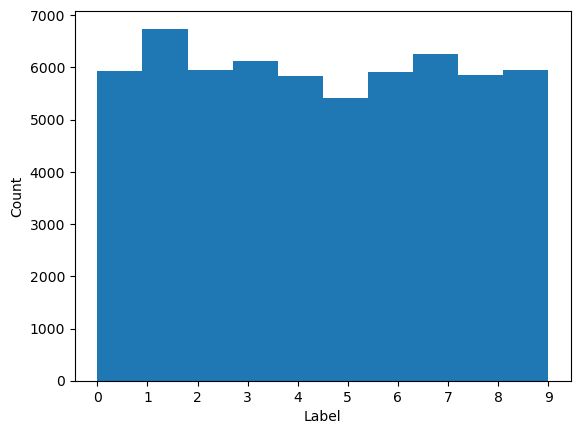

In [4]:
plt.hist(y_train, bins=10)
plt.xticks(np.arange(10))
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Distrubution of the white pixels

In [5]:
# Define a function to calculate the number of white pixels in an image
def count_white_pixels(image):
    return np.sum(image >= 250)

# Initialize dictionaries to hold the counts of white pixels for each class
white_pixel_counts = {i: [] for i in range(10)}

# Count white pixels for each image and store in the corresponding class list
for i in range(len(x_train)):
    label = y_train[i]
    white_pixel_count = count_white_pixels(x_train[i])
    white_pixel_counts[label].append(white_pixel_count)

# Calculate the average and standard deviation of white pixels for each class
avg_white_pixels = {i: np.mean(white_pixel_counts[i]) for i in range(10)}
std_white_pixels = {i: np.std(white_pixel_counts[i]) for i in range(10)}

# Print the results
for class_label in range(10):
    print(f'Class {class_label}:')
    print(f'  Average number of white pixels: {avg_white_pixels[class_label]:.2f}')
    print(f'  Standard deviation: {std_white_pixels[class_label]:.2f}')

Class 0:
  Average number of white pixels: 82.87
  Standard deviation: 35.35
Class 1:
  Average number of white pixels: 35.26
  Standard deviation: 16.54
Class 2:
  Average number of white pixels: 67.75
  Standard deviation: 30.07
Class 3:
  Average number of white pixels: 62.33
  Standard deviation: 28.63
Class 4:
  Average number of white pixels: 51.86
  Standard deviation: 24.63
Class 5:
  Average number of white pixels: 53.35
  Standard deviation: 27.40
Class 6:
  Average number of white pixels: 60.55
  Standard deviation: 29.45
Class 7:
  Average number of white pixels: 51.16
  Standard deviation: 23.49
Class 8:
  Average number of white pixels: 63.33
  Standard deviation: 31.20
Class 9:
  Average number of white pixels: 51.16
  Standard deviation: 25.00


In [6]:
input_shape = (28, 28, 1)

# normalize the data
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0


In [7]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


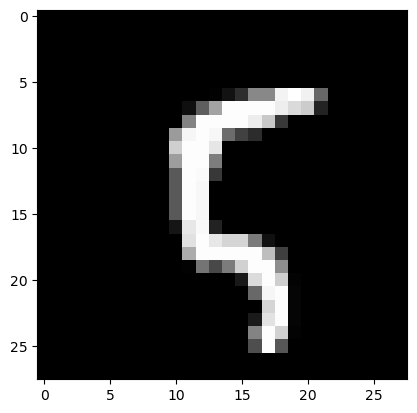

In [8]:
plt.imshow(x_train[100][:,:,0],cmap = "gray")
print(y_train[100])

In [9]:
batch_size = 64
num_classes = 10
epochs = 20

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

C:\Users\97254\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.991):
      print("\nReached 99.1% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.8556 - loss: 0.4512 - val_acc: 0.9825 - val_loss: 0.0563
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.9756 - loss: 0.0810 - val_acc: 0.9888 - val_loss: 0.0361
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9826 - loss: 0.0580 - val_acc: 0.9885 - val_loss: 0.0400
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - acc: 0.9849 - loss: 0.0484 - val_acc: 0.9905 - val_loss: 0.0381
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.9879 - loss: 0.0402 - val_acc: 0.9923 - val_loss: 0.0340
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9889 - loss: 0.0394 - val_acc: 0.9895 - val_loss: 0.0362
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9889 - loss: 0.0362 - val_acc: 0.9903 - val_loss: 0.0354
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9911 - loss: 0.0315 - val_acc: 0.9908 - val_loss: 0.0325
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 1

In [13]:
# # Save the model
# model.save('model1.keras')

# from tensorflow.keras.models import load_model
# # Load the model from a file
# model1 = load_model('model1.keras')

In [14]:
def plot_loss_and_accuracy(history):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training Loss")
    ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    # Set x and y labels for the first subplot
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')


    ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
    ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

    # Set x and y labels for the second subplot
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')


    fig.tight_layout(pad=2.0)  # Increase pad to add more space between plots

    plt.show()

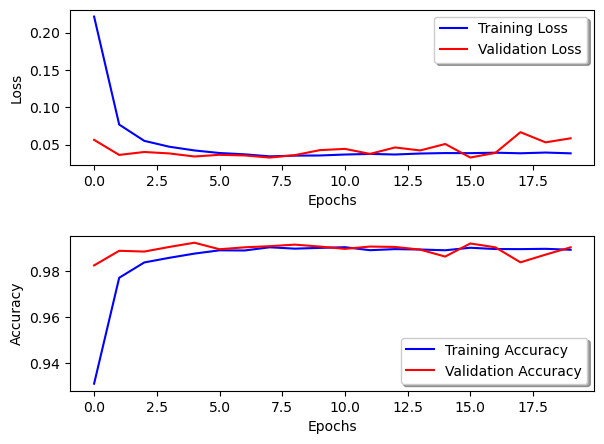

In [15]:
plot_loss_and_accuracy(history)

In [16]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
def one_hot_to_label(one_hot_array):
    return np.argmax(one_hot_array, axis=1)

In [18]:
# Get predictions
y_pred = np.argmax(predictions, axis=1)
#convert back the one hot encoded y_test vector to lables vector
y_test_org = one_hot_to_label(y_test)



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

############################################
def get_model_scores(y_test_original, y_pred):
        # Calculate accuracy
    accuracy = accuracy_score(y_test_original, y_pred)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test_original, y_pred, average='weighted')
    recall = recall_score(y_test_original, y_pred, average='weighted')
    f1 = f1_score(y_test_original, y_pred, average='weighted')

    # Calculate confusion matrix to derive sensitivity and specificity
    cm = confusion_matrix(y_test_original, y_pred)

    # Calculate sensitivity (recall for each class and average)
    sensitivity = cm.diagonal() / cm.sum(axis=1)

    # Calculate specificity for each class
    specificity = []
    for i in range(len(cm)):
        true_negative = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        false_positive = cm[:, i].sum() - cm[i, i]
        specificity.append(true_negative / (true_negative + false_positive))

    # Print the results
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall (Sensitivity): {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')

    # Print sensitivity per class with three decimal places
    sensitivity_formatted = [f'{s:.4f}' for s in sensitivity]
    print(f'Sensitivity per class: {sensitivity_formatted}')

    return accuracy, precision, recall, f1, cm, sensitivity, specificity
############################################




In [20]:
accuracy, precision, recall, f1, cm, sensitivity, specificity = get_model_scores(y_test_org, y_pred);


Accuracy: 0.991
Precision: 0.991
Recall (Sensitivity): 0.991
F1 Score: 0.991
Sensitivity per class: ['0.9929', '0.9956', '0.9903', '0.9960', '0.9949', '0.9922', '0.9916', '0.9883', '0.9846', '0.9871']


It is interesing to see the the differnet metrics gave the same result, while the sensitivity per each class gave different results. We can see the highest scores for classes 8 and 9.

### Confusion matrix

<Axes: >

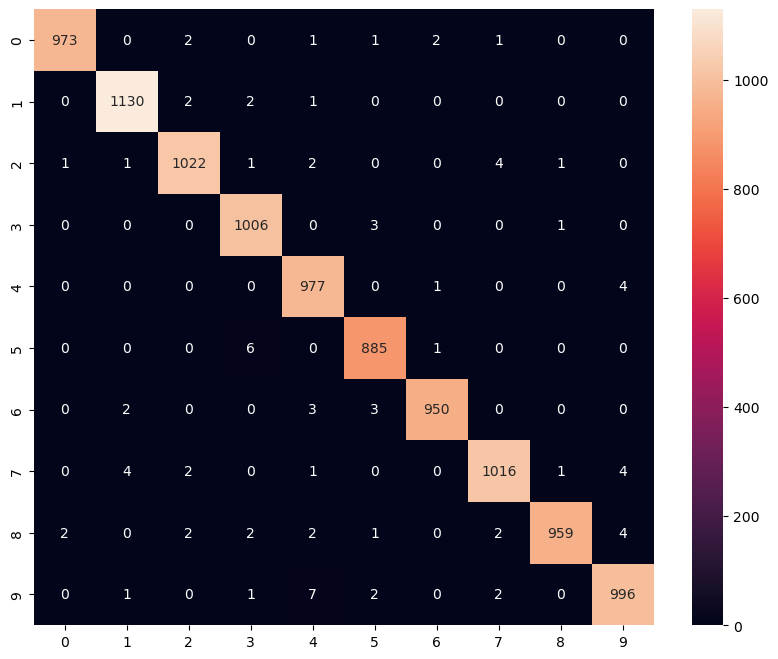

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')

From the confusion matrix, it is possible to see that the model was wrong especially between (7,1), (3,5) and it did "the worst" with (9,4). 

In [22]:
def get_loss_vs_epoch_values_and_graph(history):

    # Get the epoch with the minimum loss
    min_loss_epoch = np.argmin(history.history['loss'])
    min_loss_value = history.history['loss'][min_loss_epoch]

    print(f"Minimum loss: {min_loss_value:.3f} at epoch {min_loss_epoch + 1}")

    # Plot the loss
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.axvline(x=min_loss_epoch, color='r', linestyle='--')
    plt.show()
    
    return min_loss_epoch, min_loss_value

Minimum loss: 0.034 at epoch 8


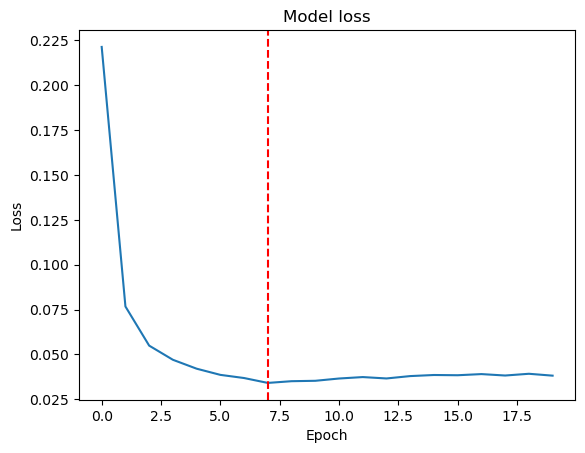

In [23]:
get_loss_vs_epoch_values_and_graph(history);


## 8.Creating new data set using pixel averaging

In [24]:
# 8. Construction of new dataset from the training dataset, changing the value of each pixel by the average of all the surrounding pixels.
from scipy.ndimage import uniform_filter

def apply_mean_filter(images):
    filtered_images = np.zeros_like(images)
    
    for i in range(images.shape[0]): # images.shape[0] receives a tuple that represents each image
        filtered_images[i] = uniform_filter(images[i], size=3)  # Apply a 3x3 mean filter
   
    return filtered_images

x_train_filtered = apply_mean_filter(x_train)


tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


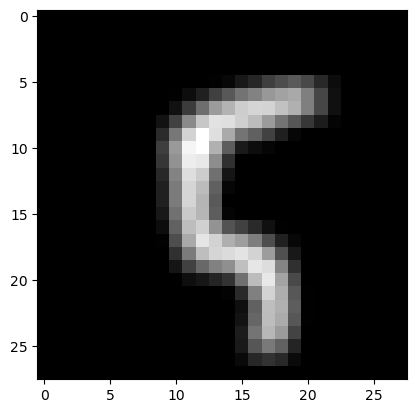

In [25]:
plt.imshow(x_train_filtered[100][:,:,0], cmap = "gray")
print(y_train[100])

In [26]:
# create the model
model_average = model

history_average = model_average.fit(x_train_filtered, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9711 - loss: 0.1013 - val_acc: 0.9895 - val_loss: 0.0452
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9841 - loss: 0.0563 - val_acc: 0.9845 - val_loss: 0.0681
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.9854 - loss: 0.0528 - val_acc: 0.9895 - val_loss: 0.0458
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9871 - loss: 0.0467 - val_acc: 0.9907 - val_loss: 0.0440
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9868 - loss: 0.0490 - val_acc: 0.9893 - val_loss: 0.0455
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9862 - loss: 0.0473 - val_acc: 0.9885 - val_loss: 0.0435
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9871 - loss: 0.0478 - val_acc: 0.9847 - val_loss: 0.0686
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.9877 - loss: 0.0483 - val_acc: 0.9918 - val_loss: 0.0337
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/

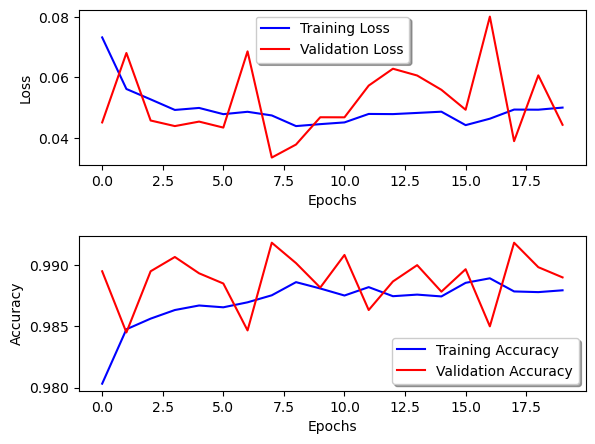

In [27]:
plot_loss_and_accuracy(history_average)

In [28]:
#oredict 
predictions_avg = model_average.predict(x_test)

# Get predictions
y_pred_avg = np.argmax(predictions_avg, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
accuracy_avg, precision_avg, recall_avg, f1_avg, cm_avg, sensitivity_avg, specificity_avg = get_model_scores(y_test_org, y_pred_avg);


Accuracy: 0.964
Precision: 0.966
Recall (Sensitivity): 0.964
F1 Score: 0.964
Sensitivity per class: ['0.9827', '0.9859', '0.9932', '0.9238', '0.9929', '0.9899', '0.9812', '0.9893', '0.8696', '0.9306']


We can see that averaging the pixles did a bluring effect, thus, the mertics of the model evaluation degraded in comparison to the original dataset.

<Axes: >

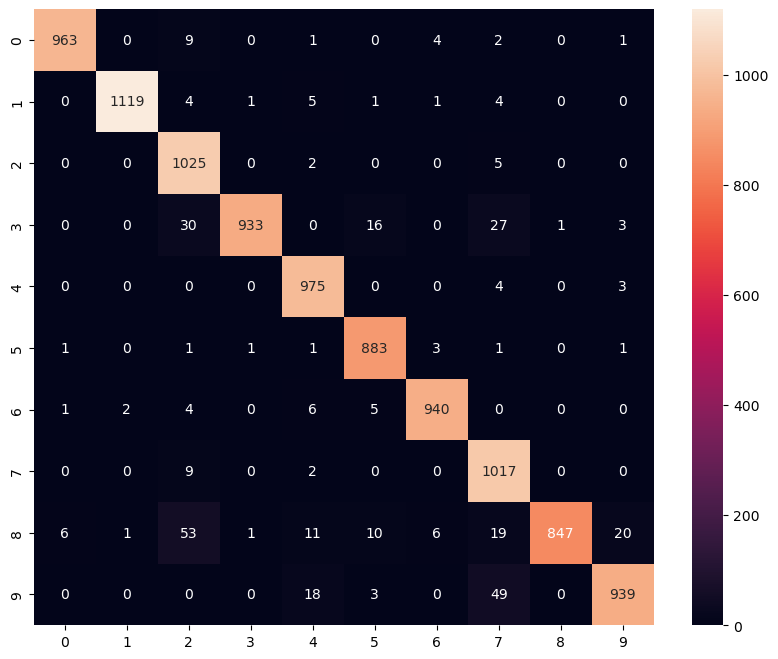

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_avg, annot=True, fmt='g')

We can see that averaging the pixels caused much higher confusion for the model between the different classes.

Minimum loss: 0.044 at epoch 9


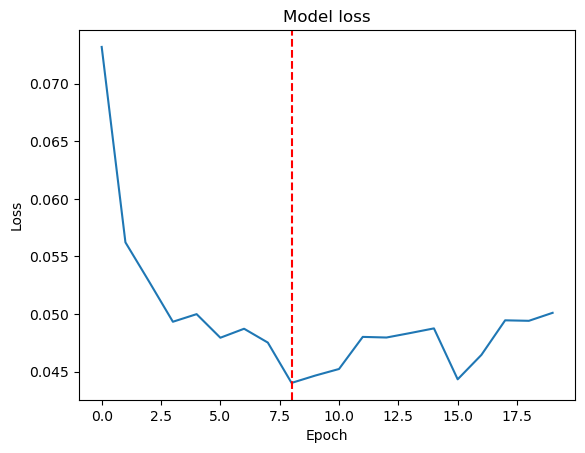

In [33]:
get_loss_vs_epoch_values_and_graph(history_average);

## PCA

In [34]:
# Flatten the images
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

In [36]:
from sklearn.decomposition import PCA
# Number of components to keep
n_components = 50

# Apply PCA
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

print(f"Original shape: {x_train_flattened.shape}")
print(f"Reduced shape: {x_train_pca.shape}")

Original shape: (60000, 784)
Reduced shape: (60000, 50)


In [37]:
# Reconstruct the images from the PCA components
x_train_reconstructed = pca.inverse_transform(x_train_pca)
x_test_reconstructed = pca.inverse_transform(x_test_pca)

# Reshape the reconstructed images to the original shape
x_train_reconstructed = x_train_reconstructed.reshape(x_train.shape[0], 28, 28, 1)
x_test_reconstructed = x_test_reconstructed.reshape(x_test.shape[0], 28, 28, 1)


In [38]:
model_pca_reconstructed = model

history_pca = model_pca_reconstructed.fit(x_train_reconstructed, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - acc: 0.9653 - loss: 0.1841 - val_acc: 0.9790 - val_loss: 0.0928
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - acc: 0.9757 - loss: 0.1049 - val_acc: 0.9852 - val_loss: 0.0651
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - acc: 0.9757 - loss: 0.1043 - val_acc: 0.9850 - val_loss: 0.0913
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.9772 - loss: 0.0951 - val_acc: 0.9822 - val_loss: 0.0990
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.9782 - loss: 0.0952 - val_acc: 0.9835 - val_loss: 0.0698
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9778 - loss: 0.0927 - val_acc: 0.9873 - val_loss: 0.0572
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.9804 - loss: 0.0791 - val_acc: 0.9855 - val_loss: 0.0684
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.9788 - loss: 0.0817 - val_acc: 0.9852 - val_loss: 0.0849
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9

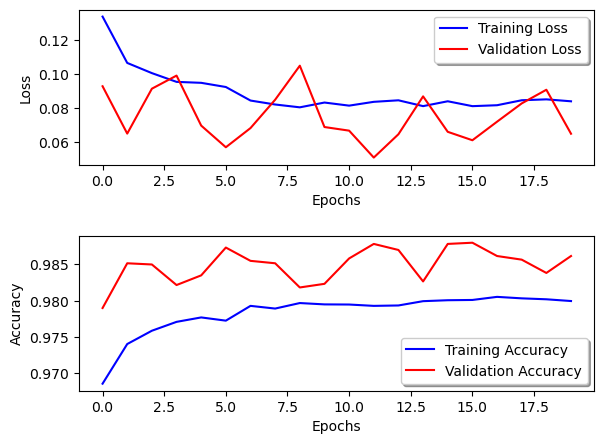

In [39]:
plot_loss_and_accuracy(history_pca)

In [40]:
#predict 
predictions_pca = model_pca_reconstructed.predict(x_test)

# Get predictions
y_pred_pca = np.argmax(predictions_pca, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [41]:
accuracy_pca, precision_pca, recall_pca, f1_pca, cm_pca, sensitivity_pca, specificity_pca = get_model_scores(y_test_org, y_pred_pca);


Accuracy: 0.970
Precision: 0.970
Recall (Sensitivity): 0.970
F1 Score: 0.970
Sensitivity per class: ['0.9714', '0.9894', '0.9777', '0.9634', '0.9929', '0.9877', '0.9802', '0.9660', '0.9456', '0.9207']


We can see that the PCA got results that are a bit less than the original dataset, but better than the averaged dataset. Perhaps because the pca describes more than 99% of the data, thus, the distortion made by the compression was less comparing to the averaged dataset.

<Axes: >

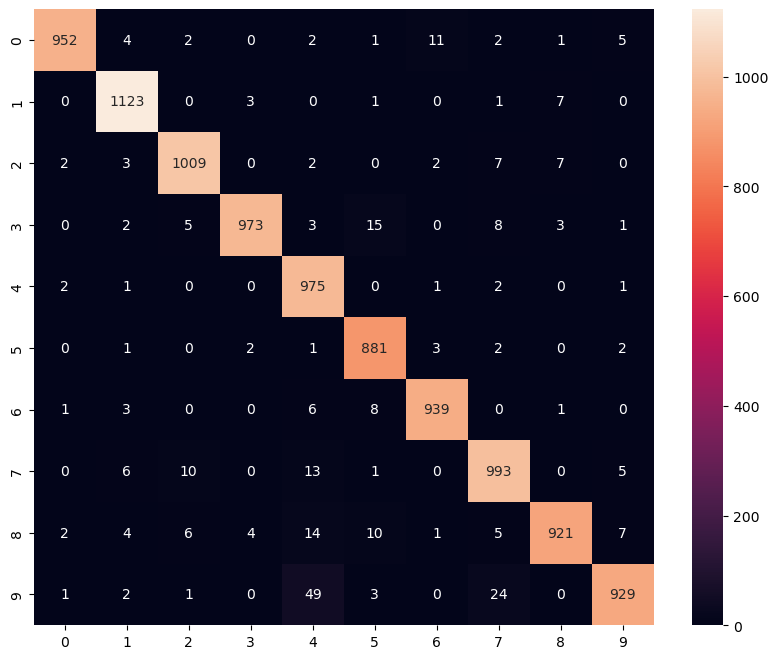

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_pca, annot=True, fmt='g')

Minimum loss: 0.080 at epoch 9


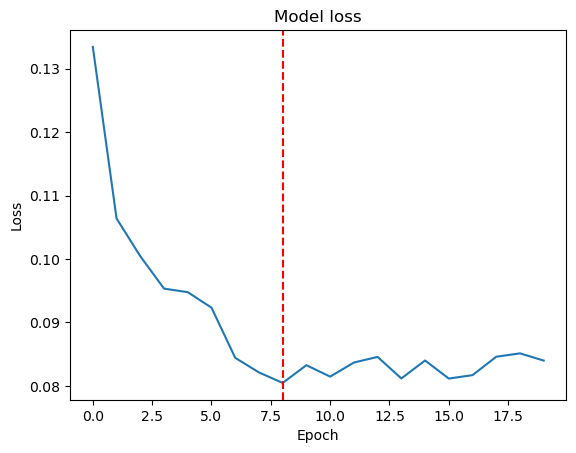

In [43]:

get_loss_vs_epoch_values_and_graph(history_pca);

## 13. Imbalanced datasets

### a. Undersampling

There is more or less even number of images for each class which is about 6000 per class. I will discard 1000 images from class 1 and class 5.

In [44]:
def discard_images(x_train, y_train, discard_classes, discard_count):
    discard_indices = []
    counts = {cls: 0 for cls in discard_classes}
    
    for i in range(len(y_train)):
        if y_train[i] in discard_classes and counts[y_train[i]] < discard_count:
            discard_indices.append(i)
            counts[y_train[i]] += 1
        if all(count >= discard_count for count in counts.values()):
            break
    
    x_train = np.delete(x_train, discard_indices, axis=0)
    y_train = np.delete(y_train, discard_indices, axis=0)
    
    return x_train, y_train


In [45]:
n_images_to_discard_from_each_class = 1000
y_downsample_lables = one_hot_to_label(y_train)
# Discard 1000 images from classes 1 and 5
x_train_downsampled, y_train_downsampled = discard_images(x_train, y_downsample_lables, discard_classes=[1, 5], discard_count=n_images_to_discard_from_each_class)

# Verify the counts after discarding
print("Class distribution before discarding:")
unique, counts = np.unique(y_downsample_lables, return_counts=True)
print(dict(zip(unique, counts)))

print("\nClass distribution after discarding:")
unique, counts = np.unique(y_train_downsampled, return_counts=True)
print(dict(zip(unique, counts)))

print("Totall num of images: ", y_train_downsampled.shape[0])

Class distribution before discarding:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Class distribution after discarding:
{0: 5923, 1: 5742, 2: 5958, 3: 6131, 4: 5842, 5: 4421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Totall num of images:  58000


In [46]:
# One-hot encode the labels
y_train_downsampled_one_hot = to_categorical(y_train_downsampled, num_classes=10)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


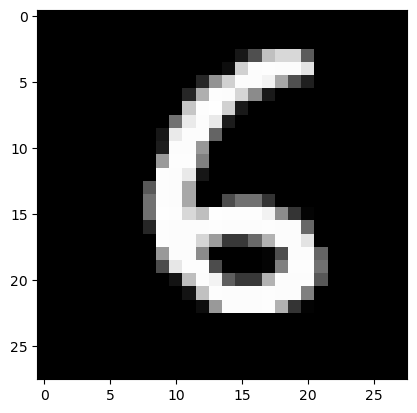

In [47]:
plt.imshow(x_train_downsampled[100][:,:,0],cmap = "gray")
print(y_train_downsampled_one_hot[100])

In [48]:
model_undersample= model

history_undersample = model_undersample.fit(x_train_downsampled, y_train_downsampled_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9716 - loss: 0.1612 - val_acc: 0.9843 - val_loss: 0.0693
Epoch 2/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - acc: 0.9813 - loss: 0.0924 - val_acc: 0.9841 - val_loss: 0.0706
Epoch 3/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9811 - loss: 0.0911 - val_acc: 0.9872 - val_loss: 0.0945
Epoch 4/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9811 - loss: 0.0867 - val_acc: 0.9869 - val_loss: 0.0898
Epoch 5/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - acc: 0.9840 - loss: 0.0745 - val_acc: 0.9881 - val_loss: 0.0586
Epoch 6/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - acc: 0.9831 - loss: 0.0777 - val_acc: 0.9891 - val_loss: 0.0559
Epoch 7/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - acc: 0.9850 - loss: 0.0731 - val_acc: 0.9876 - val_loss: 0.0601
Epoch 8/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - acc: 0.9845 - loss: 0.0764 - val_acc: 0.9859 - val_loss: 0.0705
Epoch 9/20
816/816 ━━━━━━━━━━━━━━━━━━━━ 

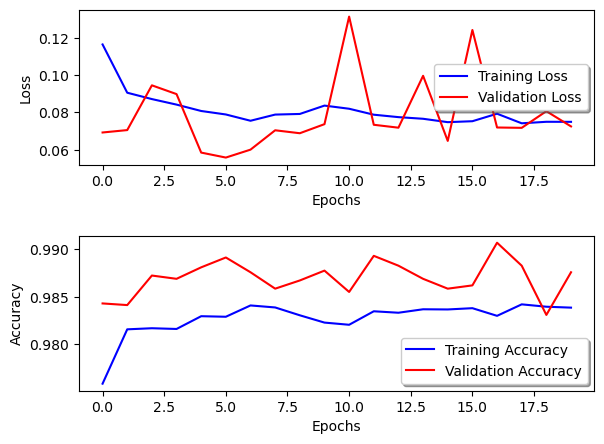

In [49]:
plot_loss_and_accuracy(history_undersample)

In [50]:
#predict 
predictions_undersample = model_undersample.predict(x_test)

# Get predictions
y_pred_undersample= np.argmax(predictions_undersample, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [51]:
accuracy_undersample, precision_undersample, recall_undersample, f1_undersample, cm_undersample, sensitivity_undersample, specificity_undersample = get_model_scores(y_test_org, y_pred_undersample);


Accuracy: 0.986
Precision: 0.986
Recall (Sensitivity): 0.986
F1 Score: 0.986
Sensitivity per class: ['0.9959', '0.9982', '0.9893', '0.9861', '0.9868', '0.9877', '0.9854', '0.9854', '0.9651', '0.9762']


We can see that undersampling from two classes did not affect much the results, comparing to the original dataset. Perhaps there was sufficient data even after the undersampling, and I could undersample even more aggressively

<Axes: >

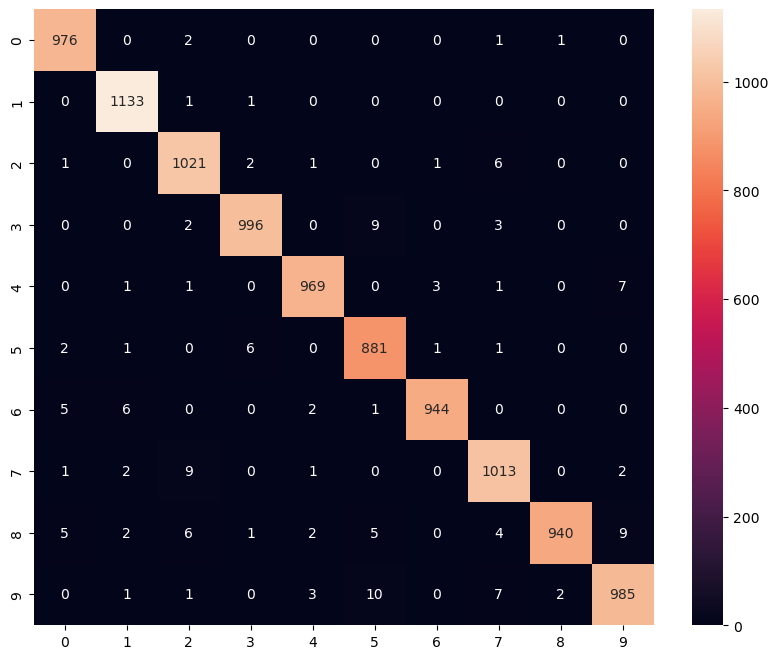

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_undersample, annot=True, fmt='g')

Minimum loss: 0.074 at epoch 18


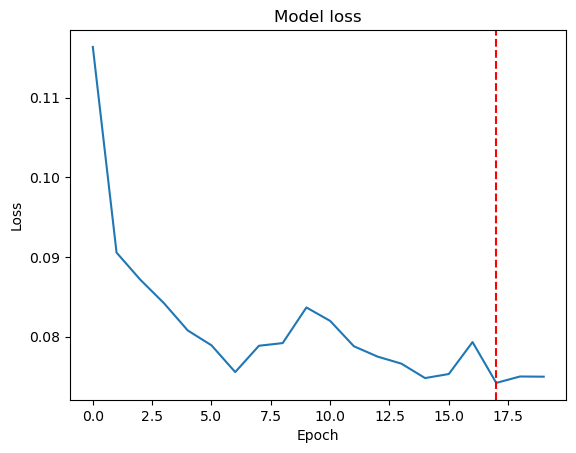

In [63]:

get_loss_vs_epoch_values_and_graph(history_undersample);

## b. data augmentation

In [56]:
import imgaug as ia
from imgaug import augmenters as iaa

#convert back the one hot encoded y_test vector to lables vector
y_train_org = one_hot_to_label(y_train)

# Reshape data to include channel dimension
x_train_aug = x_train.reshape((-1, 28, 28, 1)).astype('float32')
x_test_aug = x_test.reshape((-1, 28, 28, 1)).astype('float32')

# Normalize the images
x_train_aug /= 255.0
x_test_aug /= 255.0

# Choose classes to augment
class_augment_1 = 1
class_augment_2 = 5
augment_count_per_class = 1000

# Create an augmenter sequence
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flips
    iaa.GaussianBlur(sigma=(0, 0.5)),  # Gaussian blur
    iaa.Affine(rotate=(-25, 25)),  # Random rotations
])

def augment_class_images(x, y, class_label, augment_count):
    class_indices = np.where(y == class_label)[0]
    chosen_indices = np.random.choice(class_indices, augment_count, replace=False)
    images_to_augment = x[chosen_indices]
    
    augmented_images = augmenter(images=images_to_augment)
    augmented_labels = np.full(augment_count, class_label)
    
    return augmented_images, augmented_labels

# Augment images for the chosen classes
augmented_images_1, augmented_labels_1 = augment_class_images(x_train_aug, y_train_org, class_augment_1, augment_count_per_class)
augmented_images_2, augmented_labels_2 = augment_class_images(x_train_aug, y_train_org, class_augment_2, augment_count_per_class)

# Concatenate augmented images and labels to the original dataset
x_train_augmented = np.concatenate((x_train_aug, augmented_images_1, augmented_images_2), axis=0)
y_train_augmented = np.concatenate((y_train_org, augmented_labels_1, augmented_labels_2), axis=0)

# One-hot encode the labels
y_train_augmented_one_hot = to_categorical(y_train_augmented, num_classes=10)

# Verify the new class distribution
unique, counts = np.unique(y_train_augmented, return_counts=True)
print("Class distribution after augmentation:", dict(zip(unique, counts)))


Class distribution after augmentation: {0: 5923, 1: 7742, 2: 5958, 3: 6131, 4: 5842, 5: 6421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


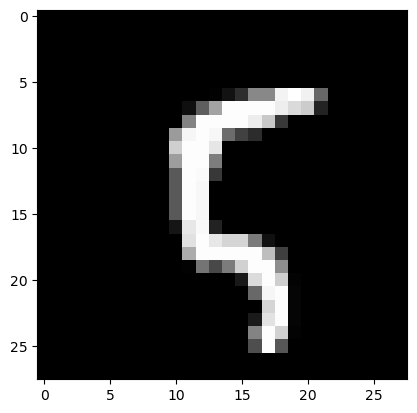

In [57]:
plt.imshow(x_train_augmented[100][:,:,0],cmap = "gray")
print(y_train_augmented_one_hot[100])

In [58]:
model_augmented= model

history_augmented = model_augmented.fit(x_train_augmented, y_train_augmented_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - acc: 0.1121 - loss: 2.5647 - val_acc: 0.2339 - val_loss: 2.2882
Epoch 2/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - acc: 0.1087 - loss: 2.3065 - val_acc: 0.2339 - val_loss: 2.3044
Epoch 3/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - acc: 0.1115 - loss: 2.3022 - val_acc: 0.2339 - val_loss: 2.2956
Epoch 4/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - acc: 0.1108 - loss: 2.3017 - val_acc: 0.2339 - val_loss: 2.2982
Epoch 5/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - acc: 0.1132 - loss: 2.3012 - val_acc: 0.2339 - val_loss: 2.2994
Epoch 6/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - acc: 0.1128 - loss: 2.3012 - val_acc: 0.2339 - val_loss: 2.2979
Epoch 7/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.1131 - loss: 2.3013 - val_acc: 0.2339 - val_loss: 2.3016
Epoch 8/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - acc: 0.1132 - loss: 2.3010 - val_acc: 0.2339 - val_loss: 2.2987
Epoch 9/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 

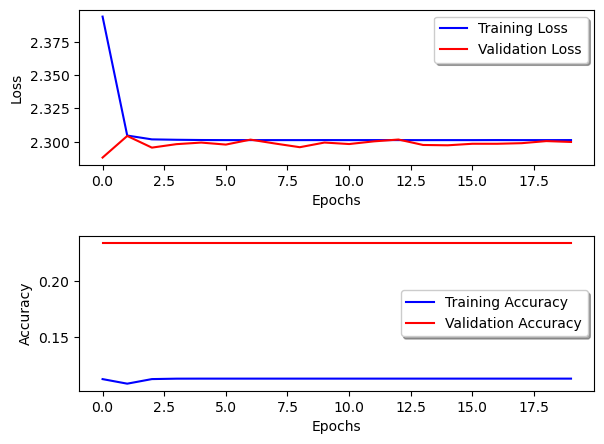

In [59]:
plot_loss_and_accuracy(history_augmented)

In [60]:
#predict 
predictions_aug = model_augmented.predict(x_test)

# Get predictions
y_pred_aug = np.argmax(predictions_aug, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [61]:
accuracy_aug, precision_aug, recall_aug, f1_aug, cm_aug, sensitivity_aug, specificity_aug = get_model_scores(y_test_org, y_pred_aug);


Accuracy: 0.986
Precision: 0.986
Recall (Sensitivity): 0.986
F1 Score: 0.986
Sensitivity per class: ['0.9939', '0.9930', '0.9922', '0.9931', '0.9857', '0.9888', '0.9864', '0.9805', '0.9651', '0.9802']


While the general metrics are not different than the other results, we can see the augmenting the dataset did improved the Sensitivity per each class.

<Axes: >

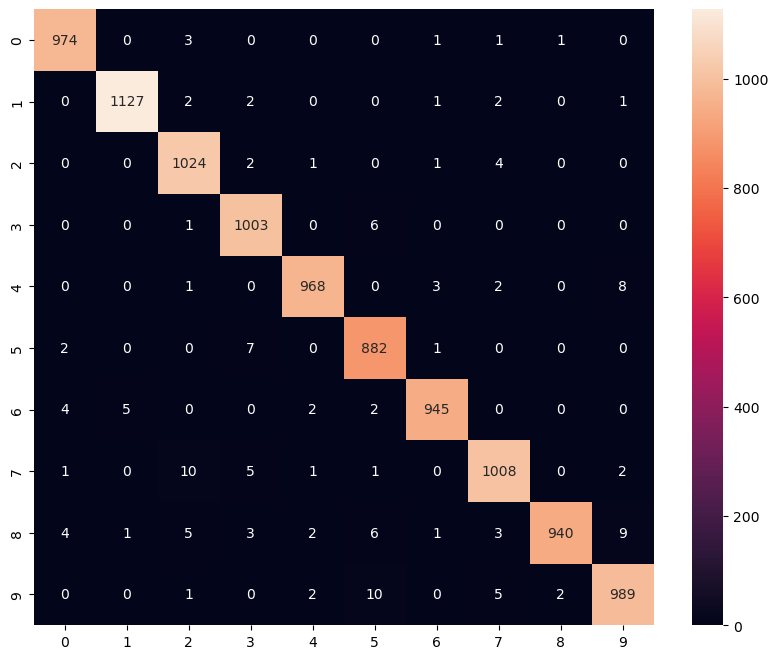

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_aug, annot=True, fmt='g')

Minimum loss: 2.301 at epoch 14


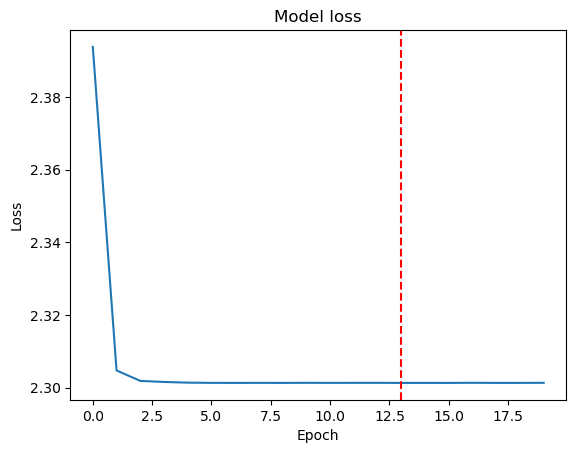

In [65]:

get_loss_vs_epoch_values_and_graph(history_augmented);